In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

heart = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

In [4]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<Figure size 432x288 with 0 Axes>

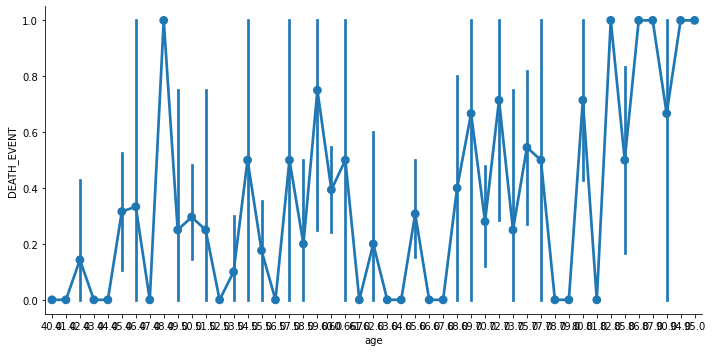

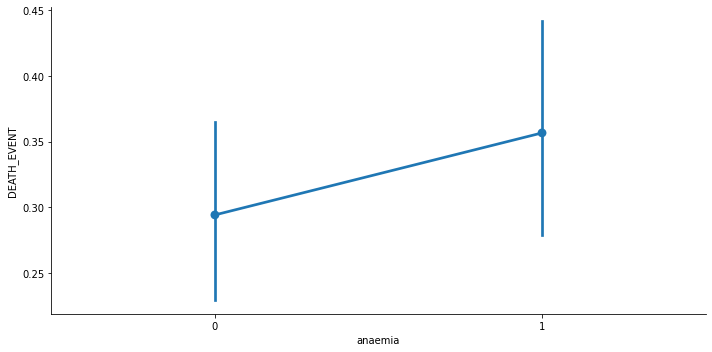

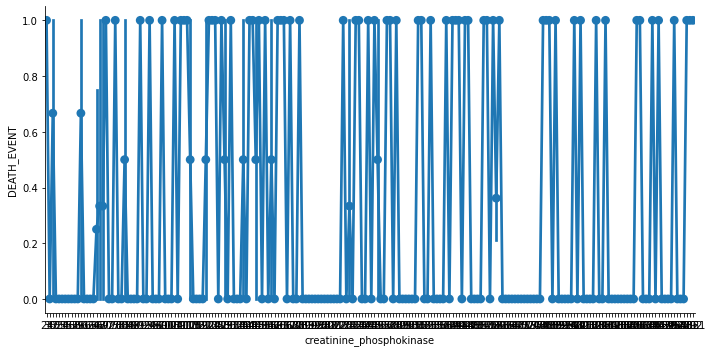

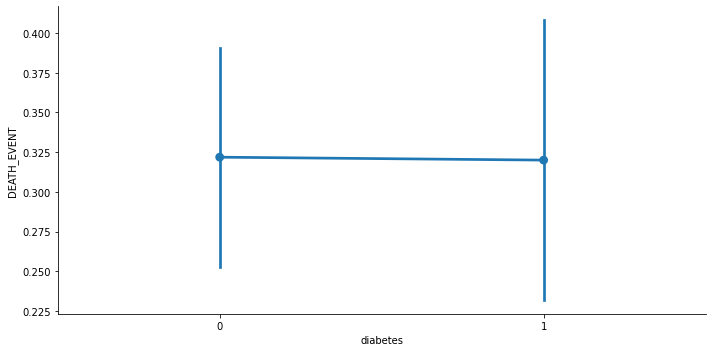

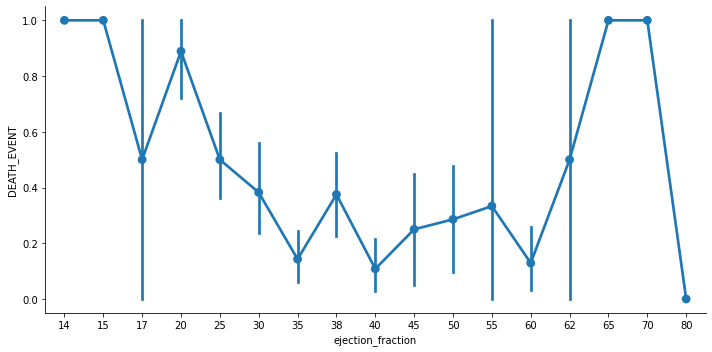

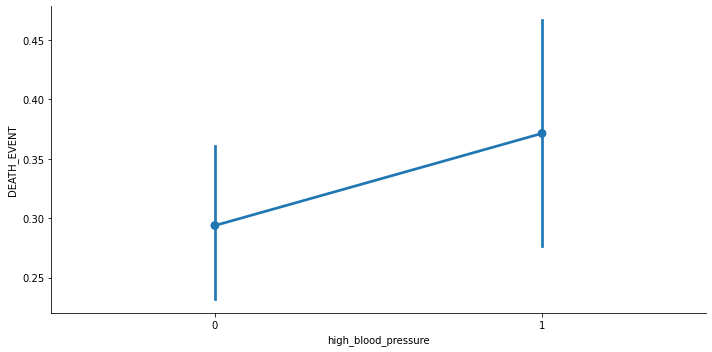

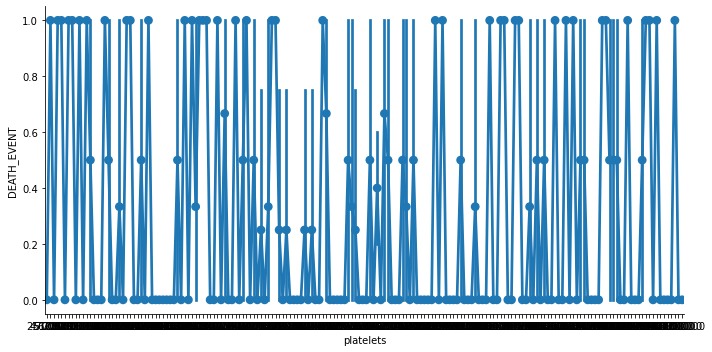

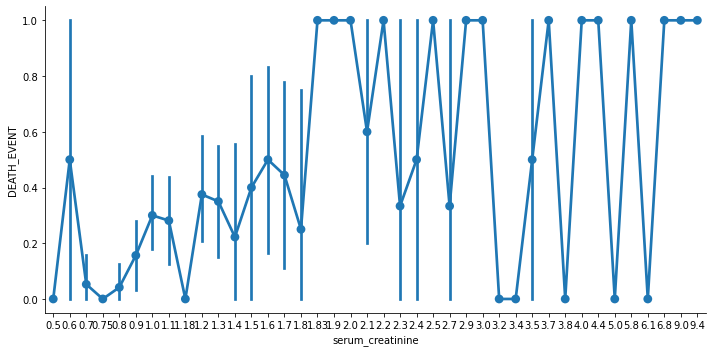

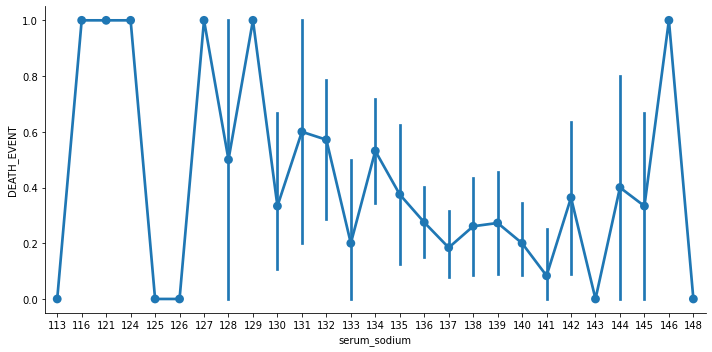

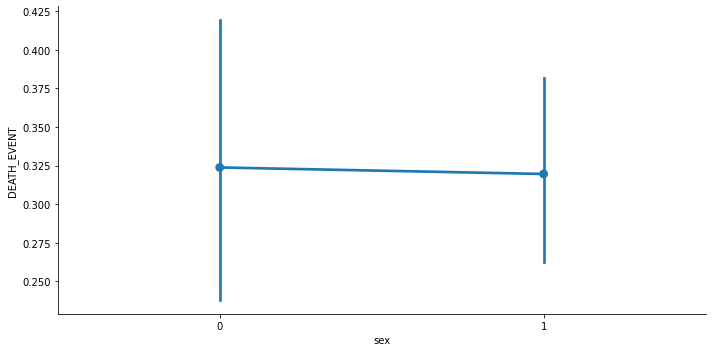

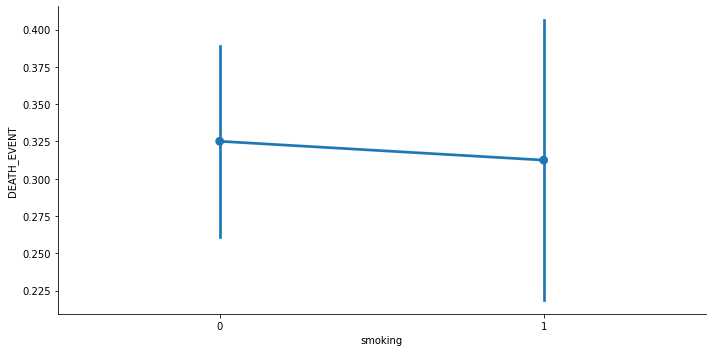

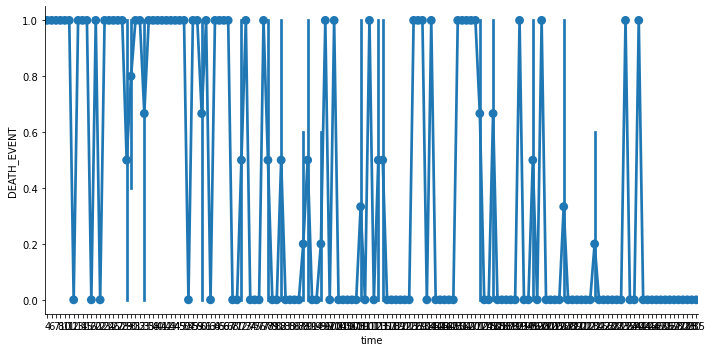

In [5]:
for i,col in enumerate(['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction', 'high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']):
  plt.figure(i)
  sb.catplot(x = col, y = 'DEATH_EVENT', data = heart, kind = 'point', aspect = 2)

In [6]:
heart.drop(['diabetes', 'sex', 'smoking'], axis = 1, inplace= True)

In [7]:
heart.head()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,0,582,20,1,265000.00,1.9,130,4,1
1,55.0,0,7861,38,0,263358.03,1.1,136,6,1
2,65.0,0,146,20,0,162000.00,1.3,129,7,1
3,50.0,1,111,20,0,210000.00,1.9,137,7,1
4,65.0,1,160,20,0,327000.00,2.7,116,8,1


NOw spliting the data for training and testing

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
feature = heart.drop('DEATH_EVENT', axis = 1)
label = heart['DEATH_EVENT']

In [10]:
train_feature,test_feature,train_label,test_label = train_test_split(feature,label,test_size = 0.5, random_state = 50)
val_feature,test_feature, val_label,test_label = train_test_split(test_feature,test_label,test_size = 0.5, random_state = 50)

In [11]:
train_feature.count()

age                         149
anaemia                     149
creatinine_phosphokinase    149
ejection_fraction           149
high_blood_pressure         149
platelets                   149
serum_creatinine            149
serum_sodium                149
time                        149
dtype: int64

Will compare Logistic regression, and boosting to understand which one will be better to work with for this data.

First one is Logistic regression(LR).

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
def ML_results(results):

  mean = results.cv_results_['mean_test_score']
  std = results.cv_results_['std_test_score']
  for mean, std, params in zip(mean, std, results.cv_results_['params']):
    print('mean: ',round(mean,3),' std: ',round(std * 2,3),' for ',format(params))
  print('\n Final parameter decided: ',format(results.best_params_))

In [14]:
LR = LogisticRegression(max_iter=500)
parameter = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
cv = GridSearchCV(LR, parameter, cv = 5)
cv.fit(train_feature,train_label.values.ravel())
LR = cv.best_estimator_
LR

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
GradientBoostingClassifier()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [19]:
gb = GradientBoostingClassifier()
parameter = {
    'learning_rate' : [0.01,0.1,1,10],
    'max_depth' : [1,2,3,4],
    'n_estimators' : [50,100,200,500]
}
cv = GridSearchCV(gb, parameter, cv = 5)
cv.fit(train_feature, train_label.ravel())
gb = cv.best_estimator_
gb

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [30]:
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score
def eval_model(name, model , feature, label):
  start = time()
  pred = model.predict(feature)
  end = time()
  accuracy = round(accuracy_score(label,pred),4)
  presision = round(precision_score(label,pred),4)
  recall = round(recall_score(label,pred),4)
  print('{} == Accuracy: {}, Precision: {}, recall: {},Latency: {}'.format(name,
                                                                     accuracy,
                                                                     presision,
                                                                     recall,
                                                                     round((end-start),3)))
  return pred

In [28]:
print('Valdiation')
eval_model('LR',LR,val_feature,val_label)
eval_model('GB',gb,val_feature, val_label)

Valdiation
LR == Accuracy: 0.8133, Precision: 0.75, recall: 0.5455,Latency: 0.002
GB == Accuracy: 0.8, Precision: 0.6842, recall: 0.5909,Latency: 0.002


Testing will be done by LR only

In [120]:
print('testing')
pred = eval_model('LR',LR,test_feature,test_label)
pred1 = eval_model('GB',gb,test_feature,test_label)
pred

testing
LR == Accuracy: 0.84, Precision: 0.8182, recall: 0.6923,Latency: 0.002
GB == Accuracy: 0.8267, Precision: 0.7407, recall: 0.7692,Latency: 0.003


array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0])

In [121]:
test_label.values

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0])

In [122]:
actual = np.empty([75], dtype = int)
j=0
for i in test_label:
  actual[j] = i
  j+=1
actual

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0])

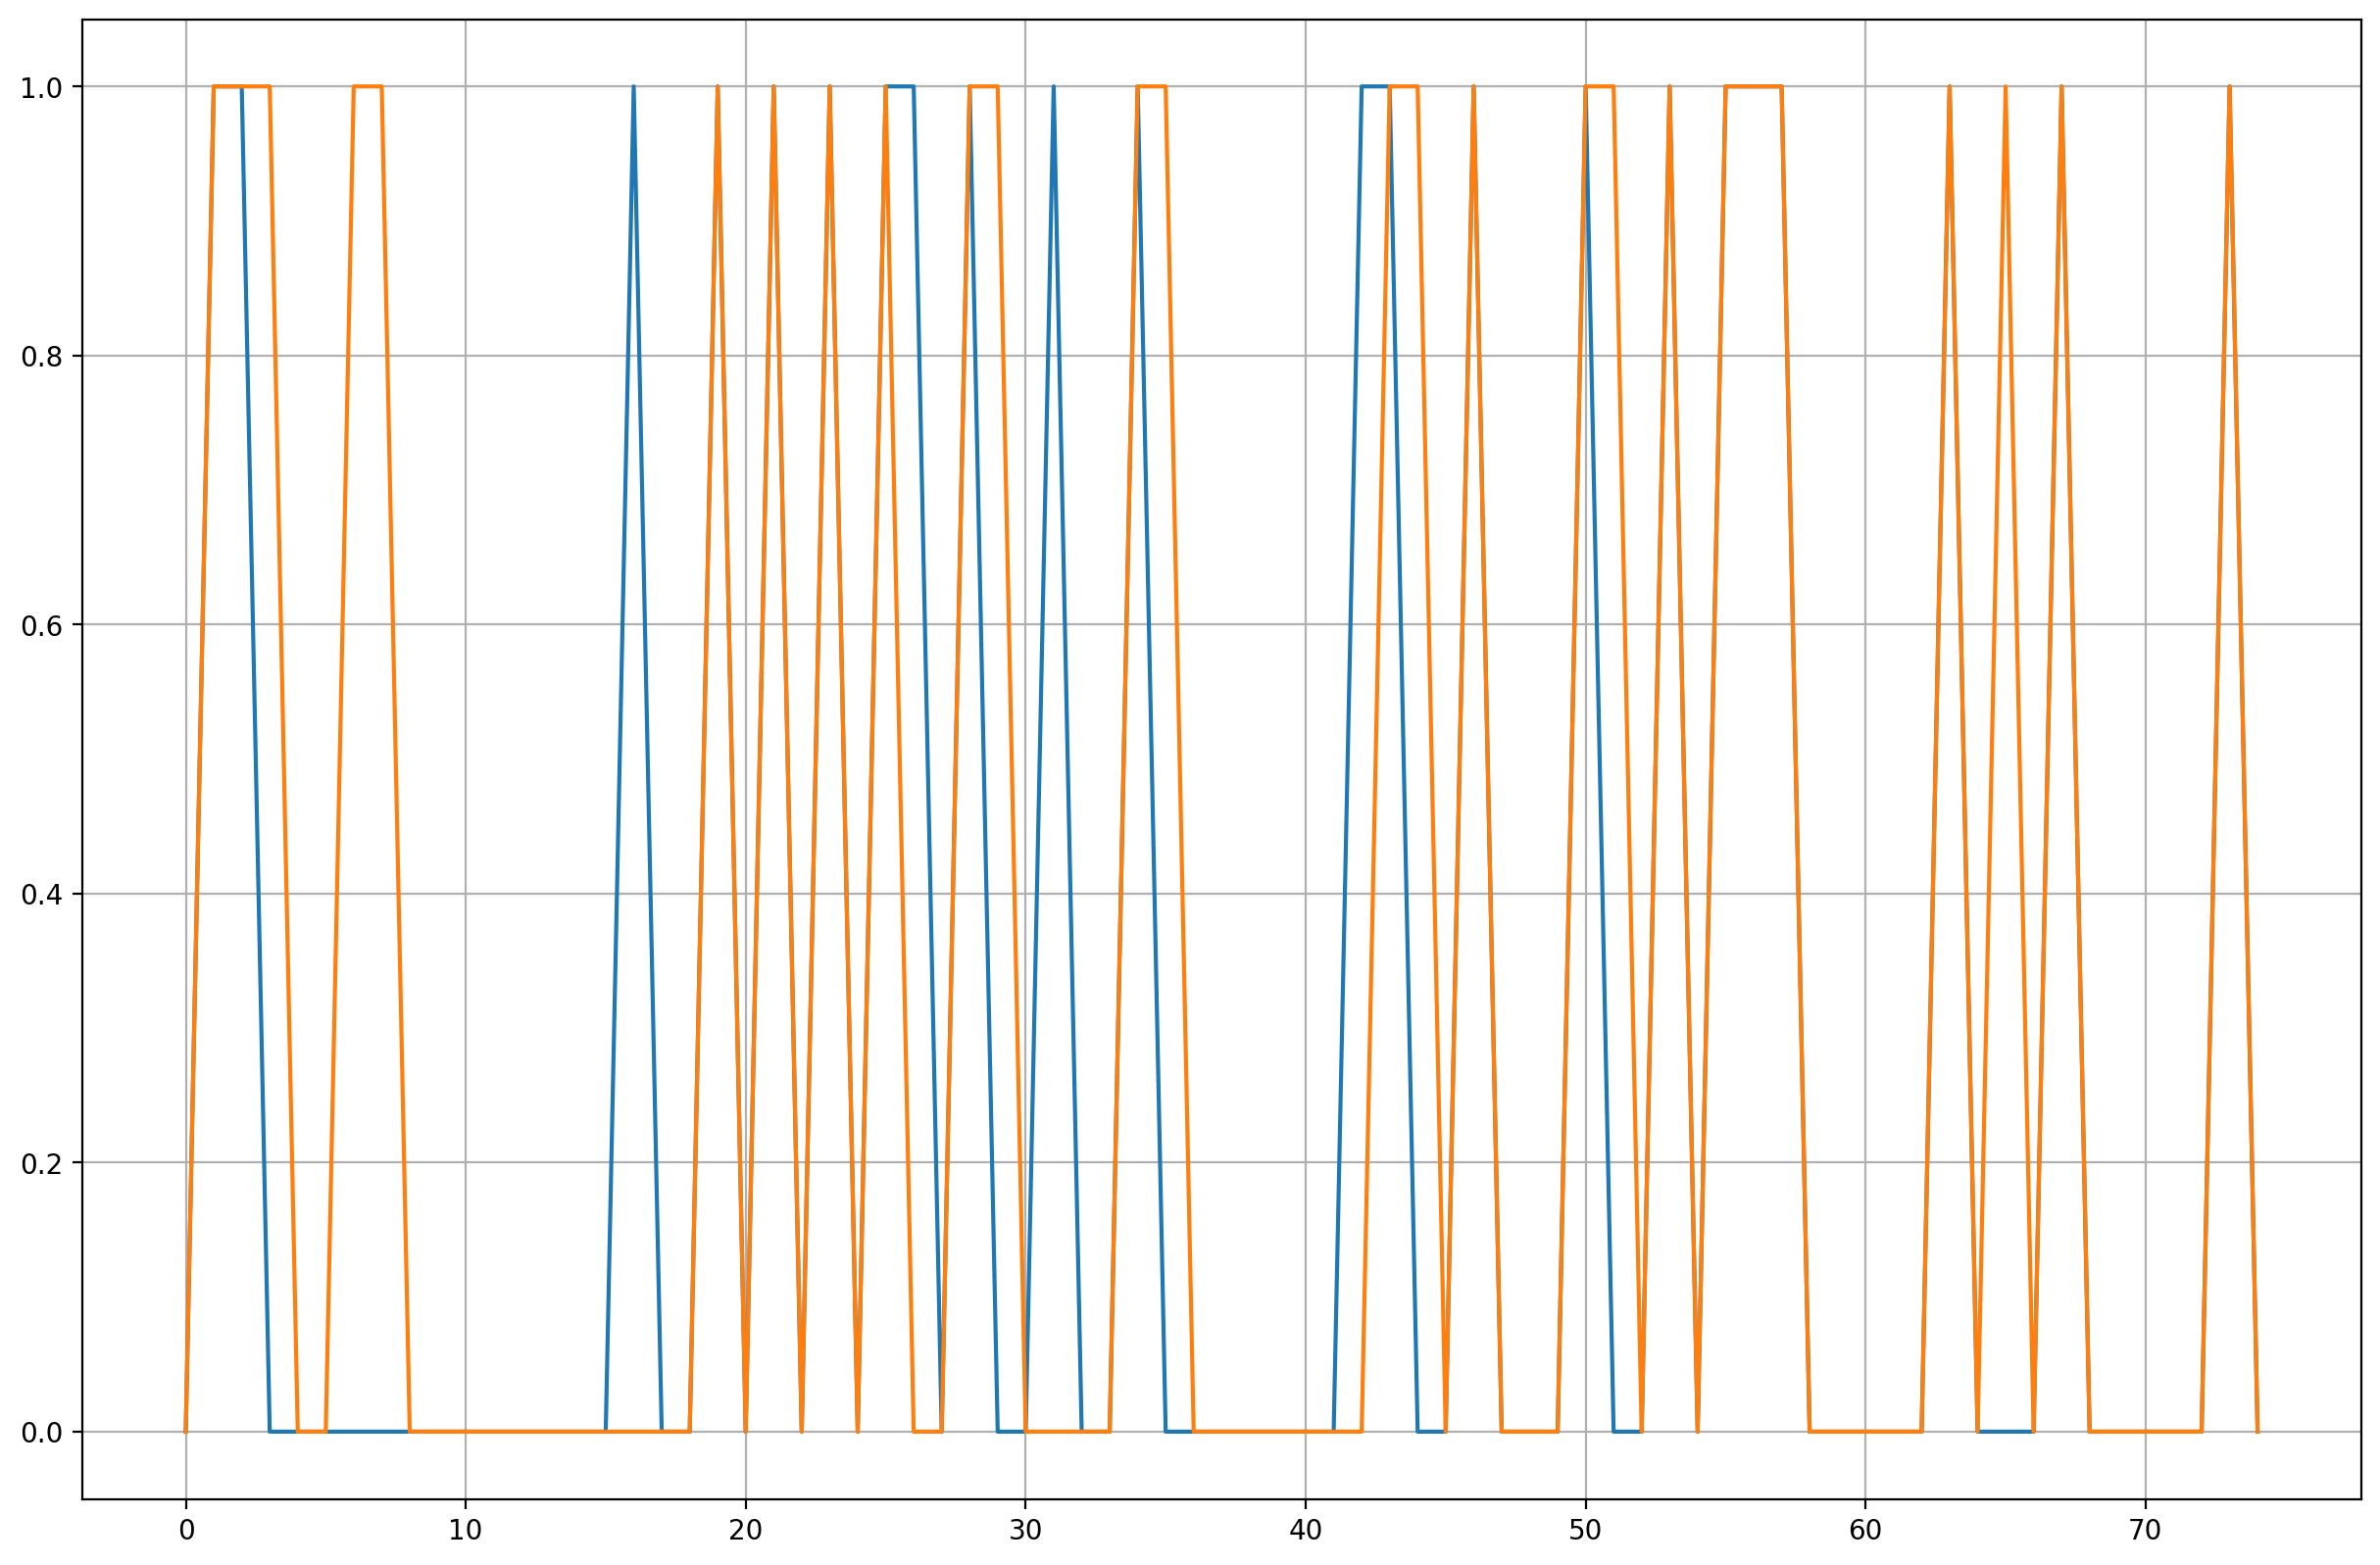

In [123]:
plt.figure(figsize=(15,10), dpi = 200)
plt.grid()
plt.plot(pred)
plt.plot(actual)